In [1]:
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IMG_DIR = "/content/images"
os.makedirs(IMG_DIR, exist_ok=True)

In [3]:

DATA_PATHS = ["/mnt/data/retail_data.csv", "/content/retail_data.csv", "retail_data.csv"]

df = None
for p in DATA_PATHS:
    if os.path.exists(p):
        try:
            df = pd.read_csv(p, low_memory=False)
            print("Loaded:", p)
            DATA_PATH = p
            break
        except:
            try:
                df = pd.read_csv(p, encoding="latin-1", low_memory=False)
                print("Loaded (latin-1):", p)
                DATA_PATH = p
                break
            except:
                pass

if df is None:
    raise FileNotFoundError("Could not find retail_data.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:40])


Loaded: /content/retail_data.csv
Shape: (302010, 30)
Columns: ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [4]:
if 'df' in locals() or 'df' in globals():
    print("DataFrame 'df' is defined.")
    display(df.head())
else:
    print("DataFrame 'df' is not defined. Please ensure the data loading cell ran successfully.")

DataFrame 'df' is defined.


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
print("Cleaned columns:", df.columns.tolist()[:40])

Cleaned columns: ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [7]:
for date_col in ['Date', 'Store_Open_Date', 'last_purchase_date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        print(f"Converted {date_col} to datetime")

print(df.dtypes[df.dtypes == "datetime64[ns]"])

Converted Date to datetime
Date    datetime64[ns]
dtype: object


In [8]:

df.columns = [c.strip().replace(" ", "_") for c in df.columns]
print("Cleaned columns:", df.columns.tolist()[:40])


Cleaned columns: ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [9]:

for date_col in ['Date', 'Store_Open_Date', 'last_purchase_date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        print(f"Converted {date_col} to datetime")

print(df.dtypes[df.dtypes == "datetime64[ns]"])


Converted Date to datetime
Date    datetime64[ns]
dtype: object


In [10]:

print(df.columns)
for col in ['Product_Cost', 'Product_Price']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted {col} to numeric")

existing_cols = [c for c in ['Product_Cost', 'Product_Price'] if c in df.columns]
print(df[existing_cols].head())


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [11]:
if 'Total_Amount' in df.columns:
    total_revenue = df['Total_Amount'].sum()
    print(f"\nTotal Revenue: {total_revenue:,.2f}")
else:
    print("Required column ('Total_Amount') not found for this analysis.")


Total Revenue: 412,565,647.61


In [12]:
if 'Total_Purchases' in df.columns:
    print("\nCentral Tendency of 'Total_Purchases':")
    print(f"  Mean Total Purchases: {df['Total_Purchases'].mean():.2f}")
    print(f"  Median Total Purchases: {df['Total_Purchases'].median():.2f}")
    print(f"  Mode Total Purchases: {df['Total_Purchases'].mode().tolist()}")
else:
    print("Required column ('Total_Purchases') not found for this analysis.")


Central Tendency of 'Total_Purchases':
  Mean Total Purchases: 5.36
  Median Total Purchases: 5.00
  Mode Total Purchases: [5.0]


In [13]:
if 'Total_Amount' in df.columns:
    print("\nStatistics for 'Total_Amount':")
    print(f"  Mean: {df['Total_Amount'].mean():.2f}")
    print(f"  Median: {df['Total_Amount'].median():.2f}")
    print(f"  Minimum: {df['Total_Amount'].min():.2f}")
    print(f"  Maximum: {df['Total_Amount'].max():.2f}")
else:
    print("Required column ('Total_Amount') not found for this analysis.")


Statistics for 'Total_Amount':
  Mean: 1367.65
  Median: 1041.12
  Minimum: 10.00
  Maximum: 4999.63


In [14]:
if 'Total_Amount' in df.columns:
    print("\nTotal and Average Total Amount per transaction:")
    print(f"  Total Amount: {df['Total_Amount'].sum():,.2f}")
    print(f"  Average Total Amount per Transaction: {df['Total_Amount'].mean():,.2f}")


Total and Average Total Amount per transaction:
  Total Amount: 412,565,647.61
  Average Total Amount per Transaction: 1,367.65


In [15]:
for col in ['Total_Amount', 'Amount']:
    if col in df.columns:
        print(f"\nSkewness and Kurtosis for {col}:")
        print(f"  Skewness: {df[col].skew():.4f}")
        print(f"  Kurtosis: {df[col].kurtosis():.4f}")
    else:
        print(f"\nRequired column ('{col}') not found for this analysis.")


Skewness and Kurtosis for Total_Amount:
  Skewness: 0.9728
  Kurtosis: 0.1752

Skewness and Kurtosis for Amount:
  Skewness: -0.0022
  Kurtosis: -1.1983


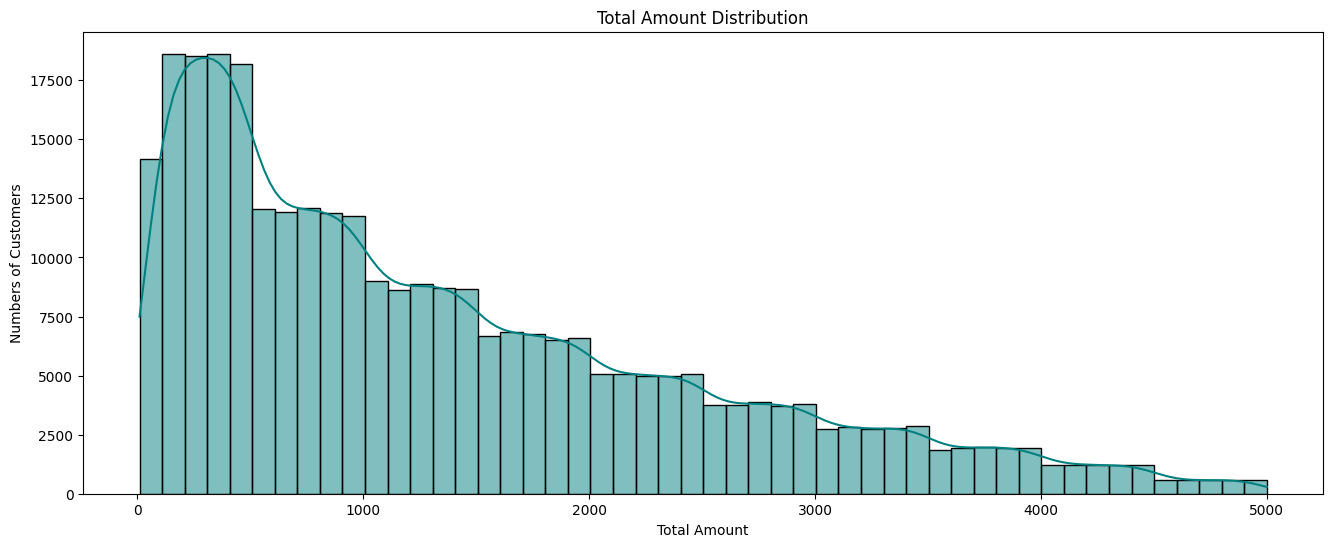

In [16]:
if 'Total_Amount' in df.columns:
    plt.figure(figsize=(16, 6))
    sns.histplot(x='Total_Amount', data=df, kde=True, bins=50, color='teal', edgecolor='black')
    plt.title('Total Amount Distribution')
    plt.xlabel('Total Amount')
    plt.ylabel('Numbers of Customers')
    plt.show()
else:
    print("Required column ('Total_Amount') not found for this analysis.")

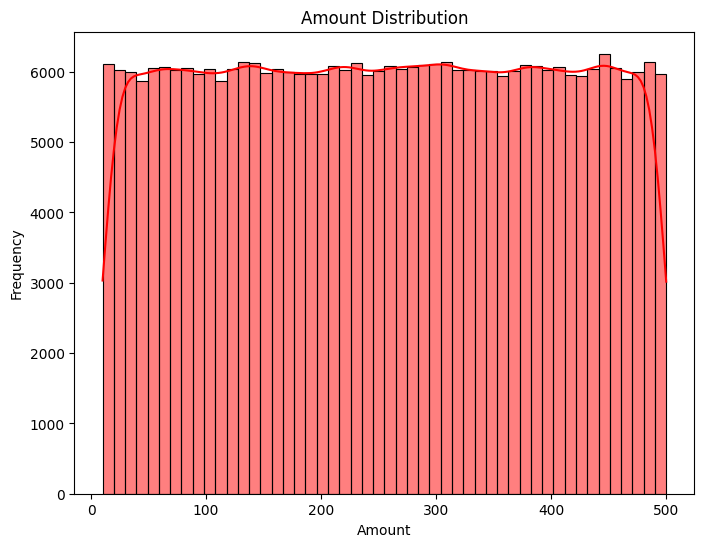

In [17]:
if 'Amount' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(x='Amount', data=df, kde=True, bins=50, color='red', edgecolor='black')
    plt.title('Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Required column ('Amount') not found for this analysis.")

In [18]:

if 'Product_Name' in df.columns:
    print("\n--- Frequency of 'Product_Name' ---")
    print(df['Product_Name'].value_counts())
    print("\n--- Percentage of 'Product_Name' ---")
    print(df['Product_Name'].value_counts(normalize=True) * 100)


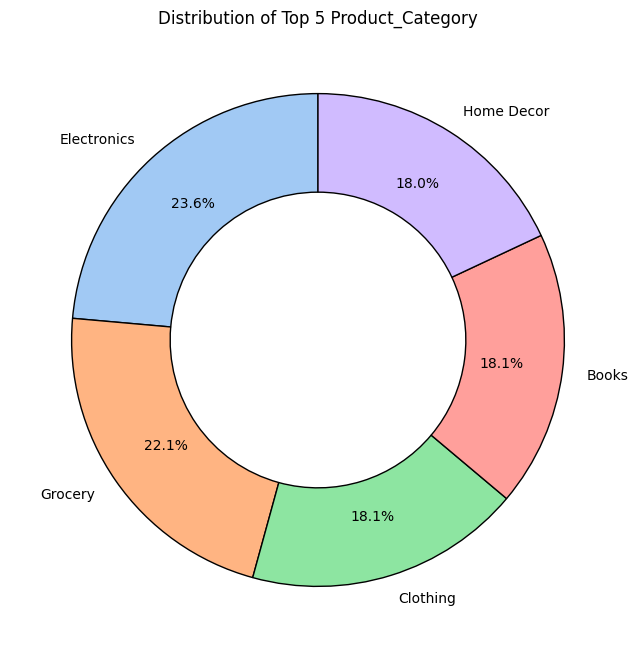

In [20]:
def plot_categorical_donut(dataframe, column_name, n_categories=5, figsize=(8, 8)):
    counts = dataframe[column_name].value_counts()
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})])
    else:
        plot_data = counts
    colors = sns.color_palette('pastel', len(plot_data))
    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(
        plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops=dict(width=0.4, edgecolor='black'),
        pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 10} # Added pctdistance, labeldistance, and textprops
    )
    for autotext in autotexts: # Increased fontsize of percentage labels
        autotext.set_fontsize(10)
    ax.set_title(f'Distribution of Top {n_categories} {column_name}')
    plt.show()

plot_categorical_donut(df, 'Product_Category', n_categories=5)

In [21]:
for col in ['Store_Name', 'Store_City', 'Store_Location']:
    if col in df.columns:
        print(f"\n--- Distribution for {col} ---")
        print("Counts:")
        print(df[col].value_counts())
        print("\nProportions (%):")
        print(df[col].value_counts(normalize=True) * 100)

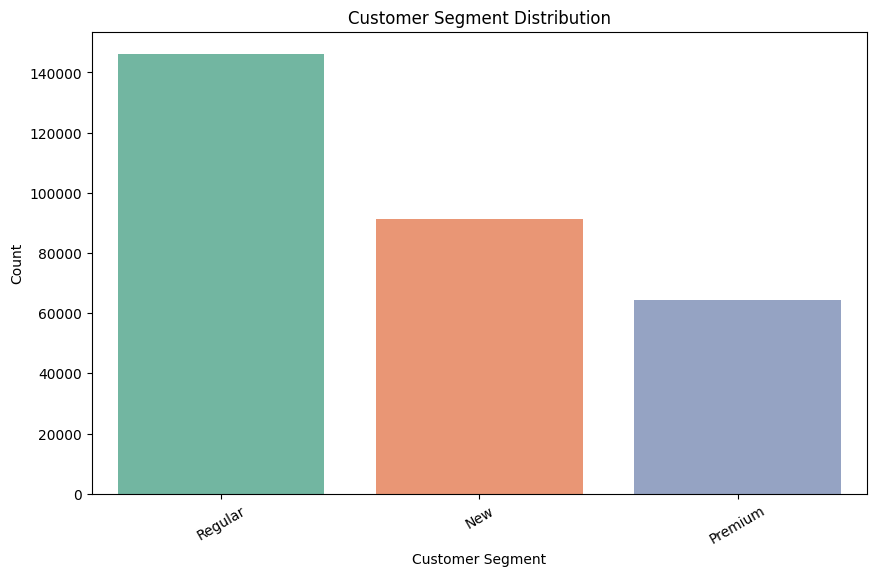

In [22]:
if 'Customer_Segment' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Customer_Segment', data=df, order=df['Customer_Segment'].value_counts().index, palette='Set2')
    plt.title('Customer Segment Distribution')
    plt.xlabel('Customer Segment')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()
else:
    print("Required column ('Customer_Segment') not found for this analysis.")

In [23]:
if 'Country' in df.columns:
    print("Unique values and counts in 'Country' column:")
    display(df['Country'].value_counts().head())
    print("\nUnique values and counts in 'State' column:")
    display(df['State'].value_counts().head())

else:
    print("Required column ('Country') not found for this analysis.")

Unique values and counts in 'Country' column:


,count
Country,
USA,95223
UK,63066
Germany,52830
Australia,45319
Canada,45301



Unique values and counts in 'State' column:


,count
State,
England,63059
Berlin,52822
New South Wales,45317
Ontario,45312
Connecticut,21658


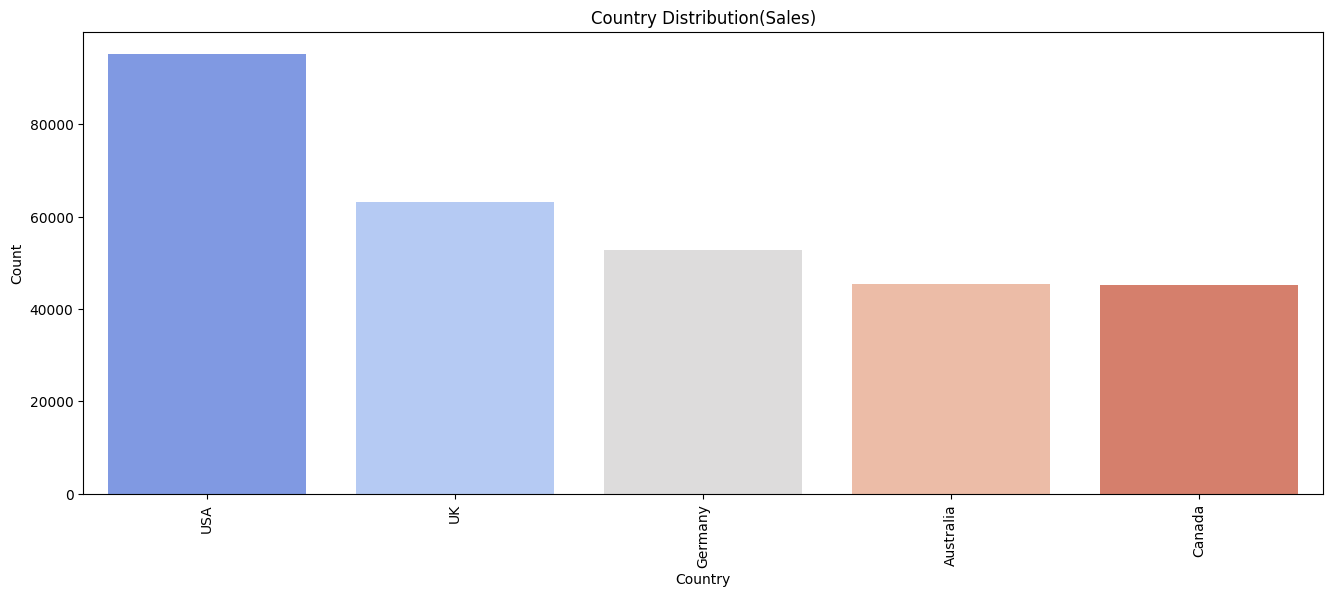

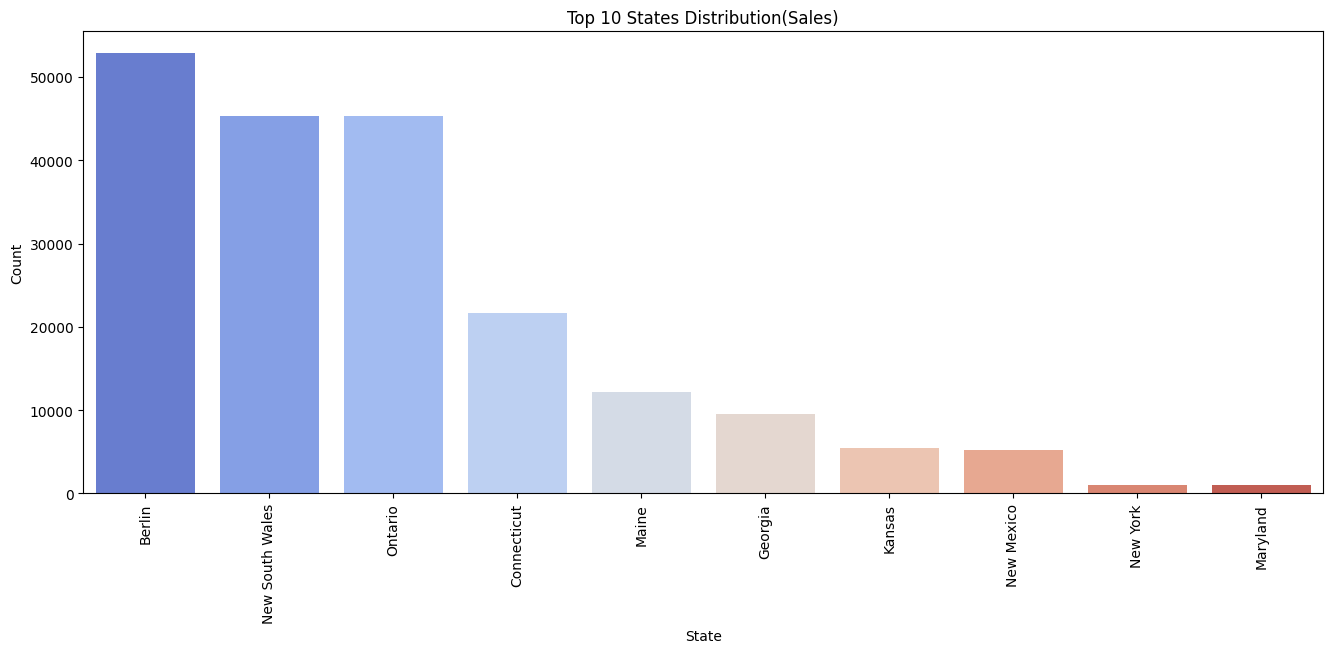

In [24]:
if 'Country' in df.columns:
    country_counts = df['Country'].value_counts()
    if 'England' in country_counts.index and 'UK' in country_counts.index:
        country_counts['UK'] += country_counts['England']
        country_counts = country_counts.drop('England')
    elif 'England' in country_counts.index and 'UK' not in country_counts.index:
         country_counts = country_counts.rename({'England': 'UK'})

    country_counts = country_counts.sort_values(ascending=False) # Removed head(10)

    plt.figure(figsize=(16, 6))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
    plt.title('Country Distribution(Sales)') # Changed title
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

if 'State' in df.columns:
    state_counts = df['State'].value_counts()
    if 'England' in state_counts.index:
        state_counts = state_counts.drop('England')
    state_counts = state_counts.head(10)
    plt.figure(figsize=(16, 6))
    sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
    plt.title('Top 10 States Distribution(Sales)') # Changed title
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

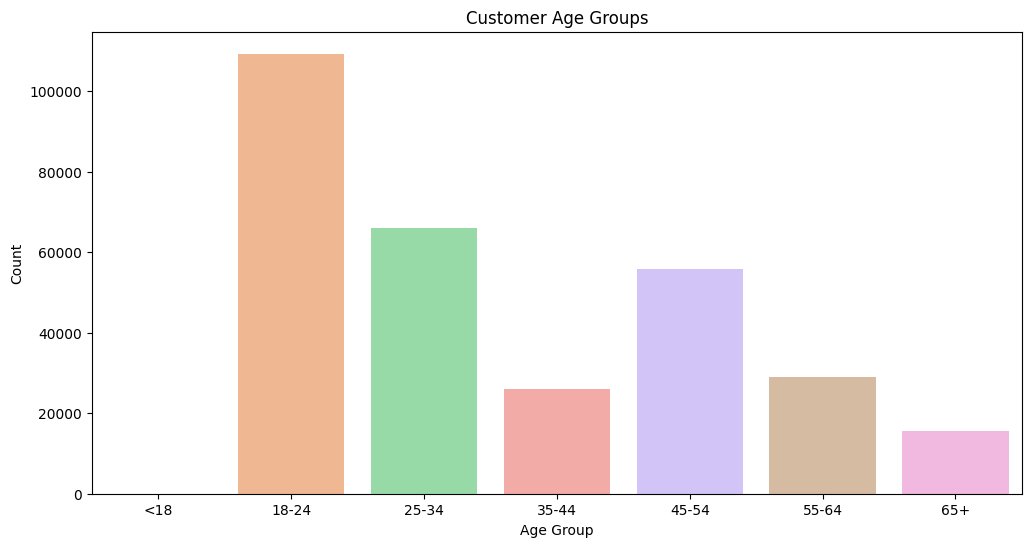

In [25]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12,6))
sns.countplot(x='Age_Group', data=df, palette='pastel', order=age_labels)
plt.title('Customer Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

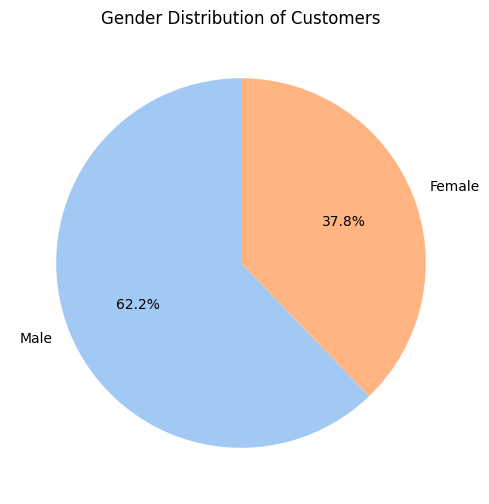

In [26]:
if 'Gender' in df.columns:
    plt.figure(figsize=(6, 6))
    gender_counts = df['Gender'].value_counts()
    plt.pie(
        gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel')
    )
    plt.title('Gender Distribution of Customers')
    plt.show()


--- Customer Feedback Sample ---
0    Excellent
1    Excellent
2      Average
3    Excellent
4          Bad
5         Good
6          Bad
7          Bad
8          Bad
9    Excellent
Name: Feedback, dtype: object


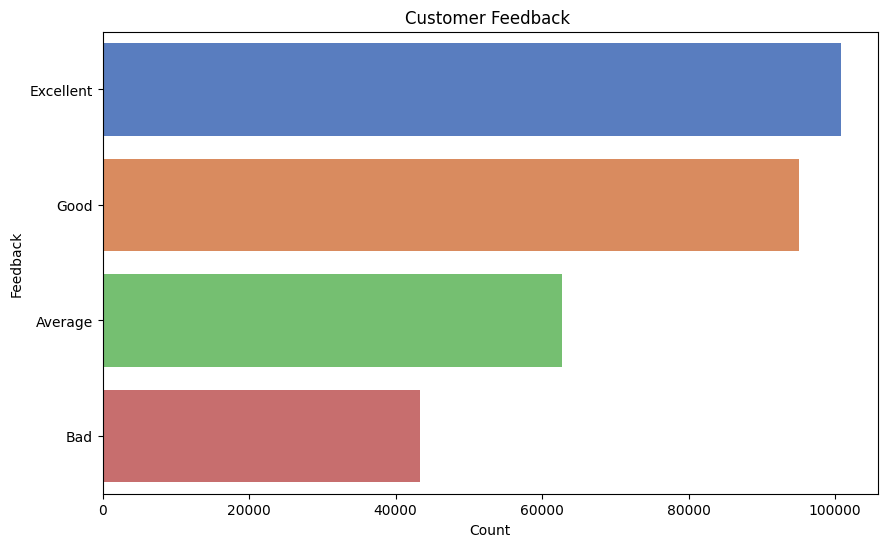

In [32]:
if 'Feedback' in df.columns:
    print("\n--- Customer Feedback Sample ---")
    print(df['Feedback'].head(10))

    if pd.api.types.is_numeric_dtype(df['Feedback']):
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Feedback', data=df, palette='pastel')
        plt.title('Feedback Rating Distribution')
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        top_feedback = df['Feedback'].value_counts().head(10)
        sns.barplot(x=top_feedback.values, y=top_feedback.index, palette='muted')
        plt.title('Customer Feedback ')
        plt.xlabel('Count')
        plt.ylabel('Feedback')
        plt.show()


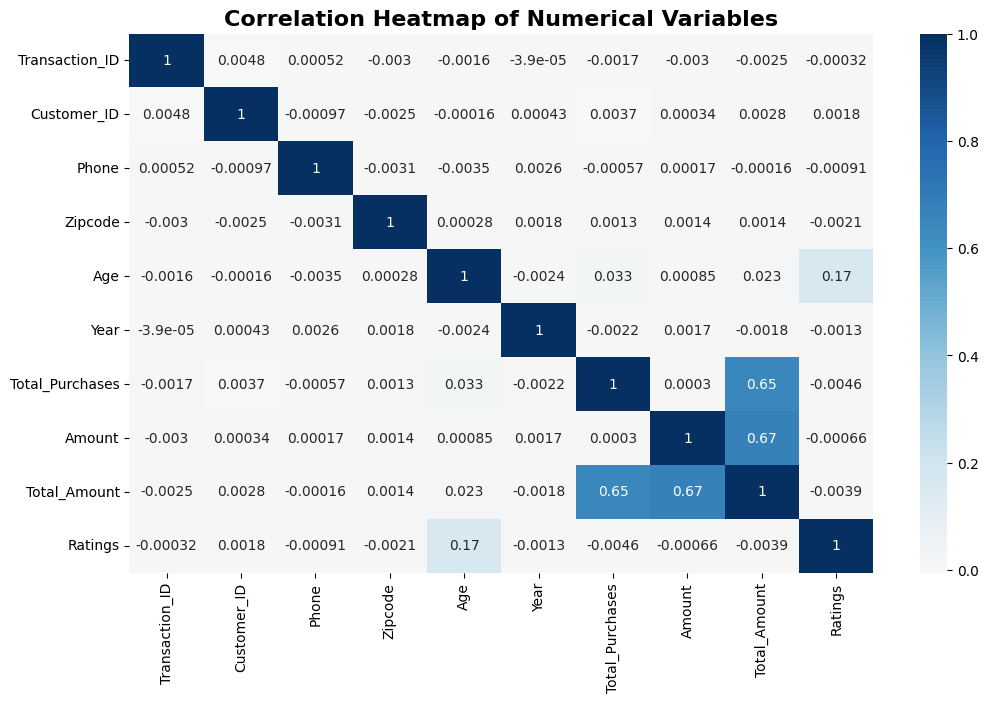

In [28]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df[numerical_columns].corr(method='pearson'), annot=True, cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.show()

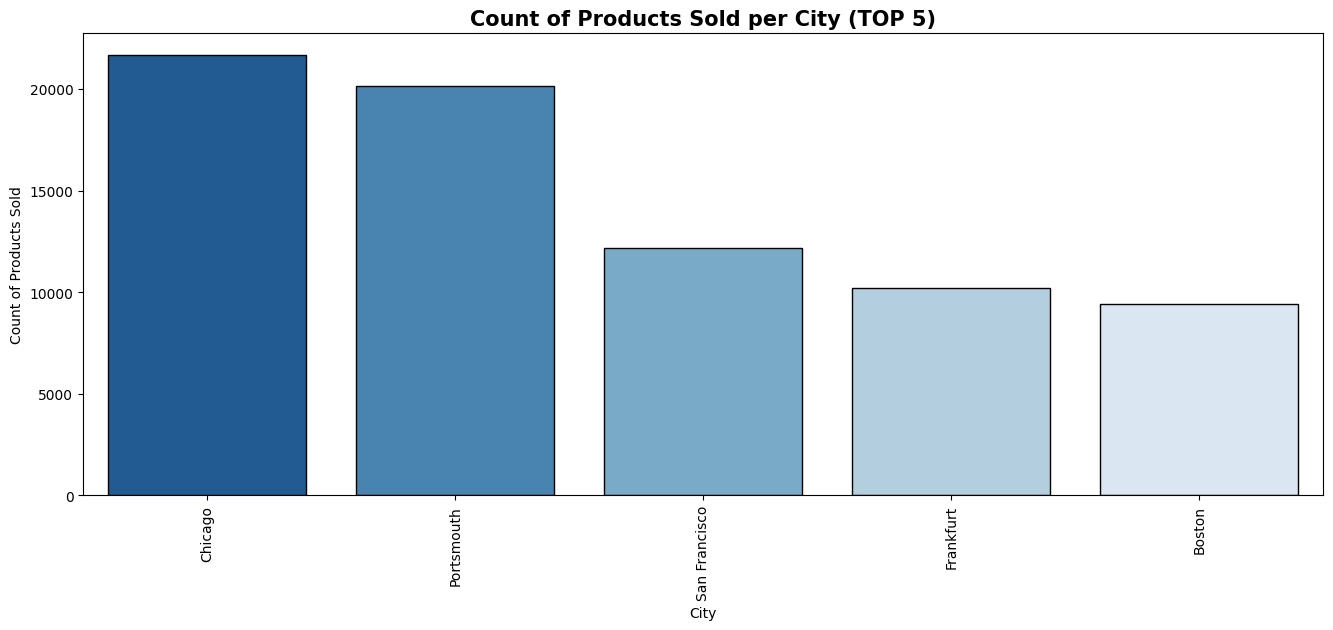

In [29]:
if 'City' in df.columns and 'products' in df.columns:
    city_product_counts = df.groupby('City')['products'].count().sort_values(ascending=False).head(5)

    plt.figure(figsize=(16, 6))
    sns.barplot(x=city_product_counts.index, y=city_product_counts.values,
                palette="Blues_r", edgecolor="black")
    plt.title('Count of Products Sold per City (TOP 5)', fontsize=15, fontweight='bold')
    plt.xlabel('City')
    plt.ylabel('Count of Products Sold')
    plt.xticks(rotation=90)
    plt.show()

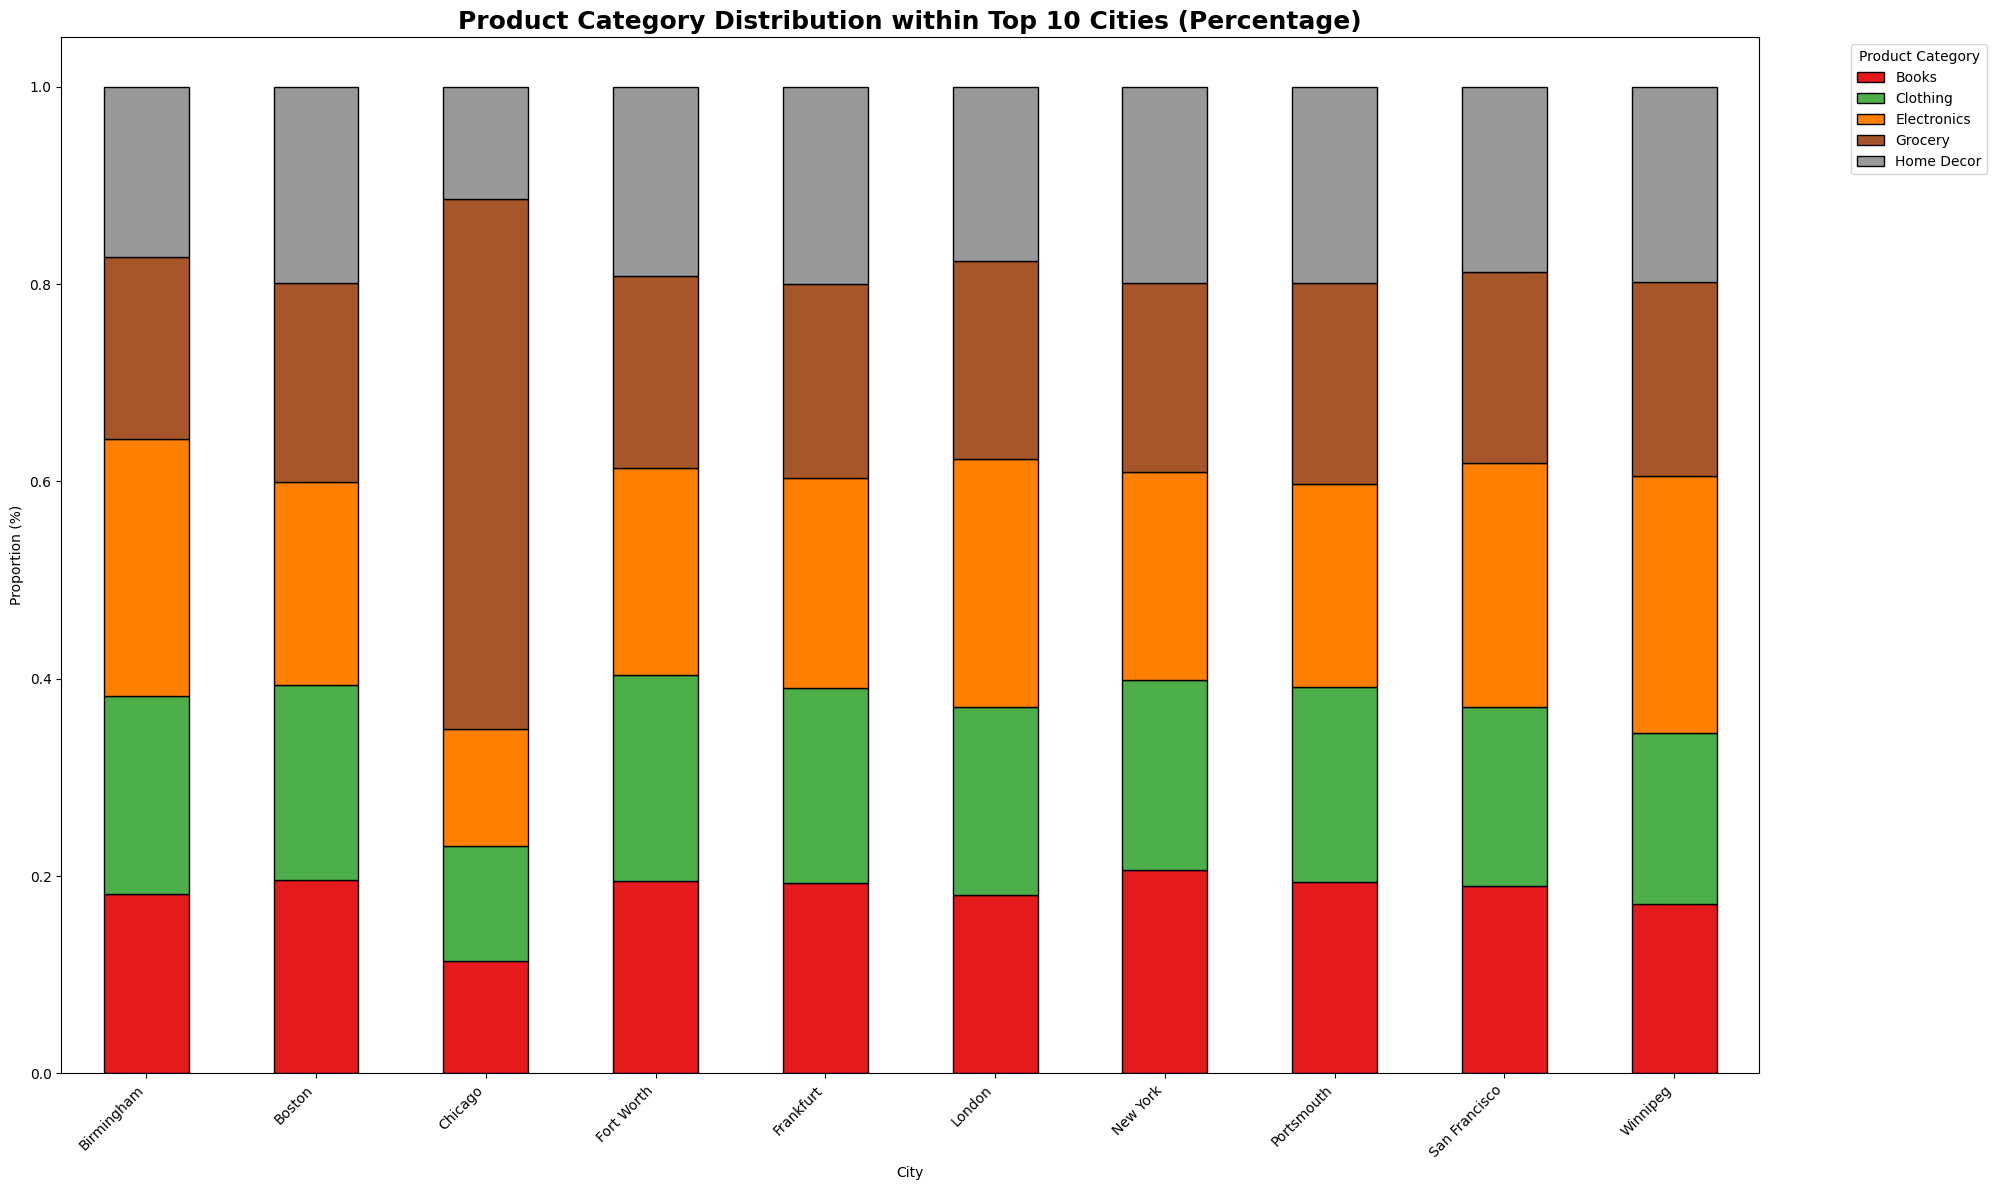

In [30]:
if 'City' in df.columns and 'Product_Category' in df.columns:
    top_cities = df['City'].value_counts().head(10).index.tolist()
    df_top_cities = df[df['City'].isin(top_cities)].copy()

    cross_tab = pd.crosstab(df_top_cities['City'], df_top_cities['Product_Category'])
    percentage_cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)  # Convert to proportions

    plt.figure(figsize=(20, 12)) # Increased figure height
    percentage_cross_tab.plot(kind="bar", stacked=True, colormap="Set1",
                              edgecolor="black", ax=plt.gca())

    plt.title('Product Category Distribution within Top 10 Cities (Percentage)', fontsize=18, fontweight='bold')
    plt.xlabel('City')
    plt.ylabel('Proportion (%)')
    plt.xticks(rotation=45, ha="right")
    plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

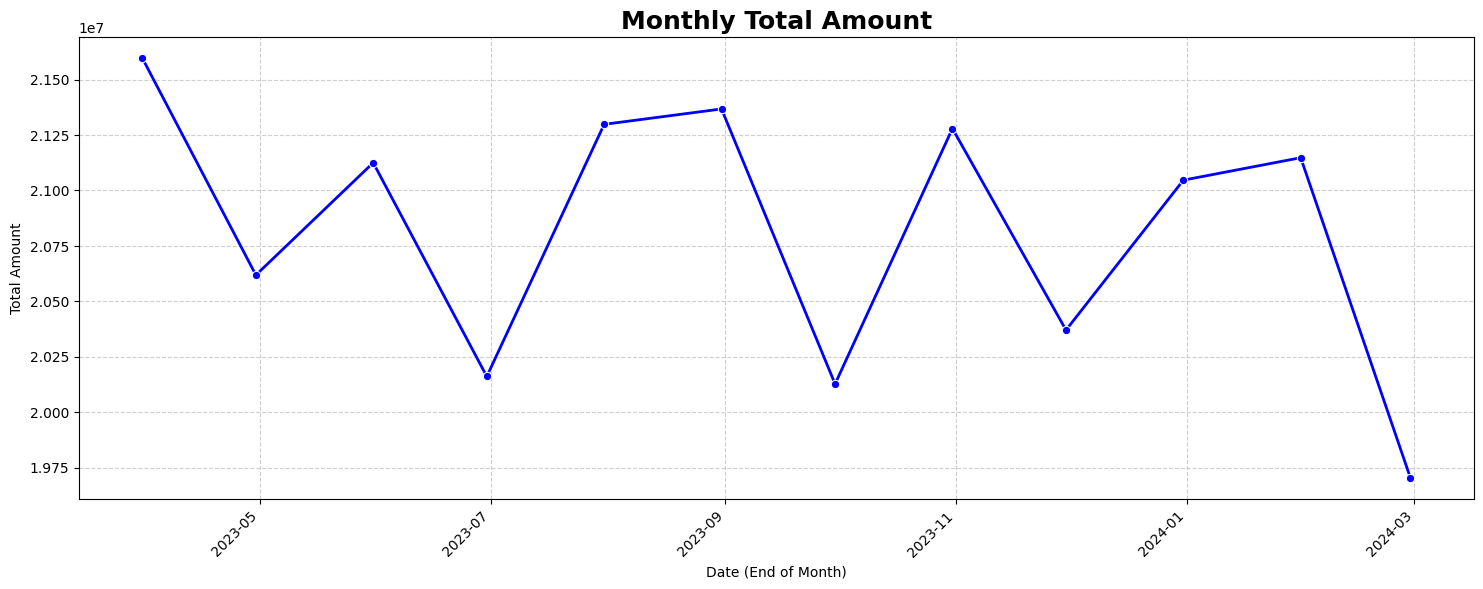

In [31]:
if 'Date' in df.columns and 'Total_Amount' in df.columns:
    monthly_amount_summary = df.set_index('Date')['Total_Amount'].resample('M').sum().reset_index()

    plt.figure(figsize=(18, 6))
    sns.lineplot(x='Date', y='Total_Amount', data=monthly_amount_summary,
                 color='blue', linewidth=2, marker="o")

    plt.title('Monthly Total Amount', fontsize=18, fontweight='bold')
    plt.xlabel('Date (End of Month)')
    plt.ylabel('Total Amount')
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()